[Forecasting: Principles and Practice](https://otexts.com/fpp2/)

In [1]:
import matplotlib.pyplot as plt

from graph_traffic.get_data import get_data
from graph_traffic.config import figures_path
from graph_traffic.dataloading import npzDataset
from graph_traffic.baseline_models import MeanRegressor, MedianRegressor, RepeatRegressor, RepeatLastRegressor, DaytimeRegressor, DriftRegressor
from graph_traffic.model_selection import timeseries_cv, plot_predictions
import numpy as np
from random import choices

baseline_path = figures_path + "/baseline"

data_dict = dict(
    ids_list=[1001],
    seq_len=24*4,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2019-12-31",
    dataset_name="small",
    target="intensidad",
    interactions=None
)

meteo_dict = dict(
    rain="drop",
    wind="drop",
    temperature="drop",
    humidity="drop",
    pressure="drop",
    radiation="drop"
)

temporal_dict = dict(
    year="drop",
    season="drop",
    month="drop",
    day_of_month="drop",
    weekday="drop",
    hour="drop",
    minute="drop",
    bank_holiday="drop",
    school_holiday="drop",
    working_day="drop"
)

get_data(data_dict, meteo_dict, temporal_dict)
dataset_name = data_dict["dataset_name"]
n_points = None

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = npzDataset(dataset_name, "train", n_points)
test_data = npzDataset(dataset_name, "test", n_points)

train_x = train_data.x
train_y = train_data.y

test_x = test_data.x
test_y = test_data.y

In [3]:
random_samples = choices(range(test_x.shape[0]), k=2)
random_samples

[3378, 2450]

# 1. Mean regressor

In [4]:
estimator, train_losses, test_losses = timeseries_cv(MeanRegressor(), train_x, train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 1013.36, std: 27.72
Test MAE: 991.71, std: 90.62


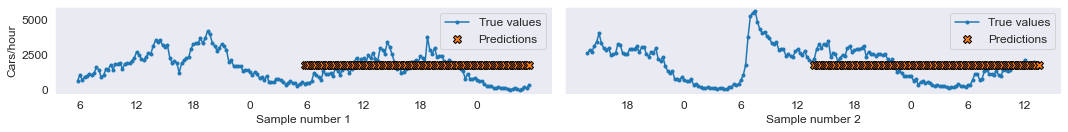

In [5]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean.png")

# 2. Median regressor

In [6]:
estimator, train_losses, test_losses = timeseries_cv(MedianRegressor(), train_x, train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 1008.60, std: 24.71
Test MAE: 998.09, std: 69.18


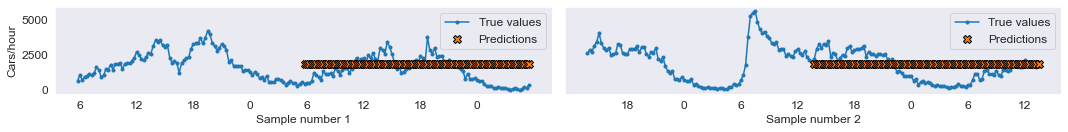

In [7]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median.png")

# 3. Repeat regressor

In [8]:
estimator, train_losses, test_losses = timeseries_cv(RepeatRegressor(), train_x, train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 491.05, std: 21.90
Test MAE: 462.33, std: 37.94


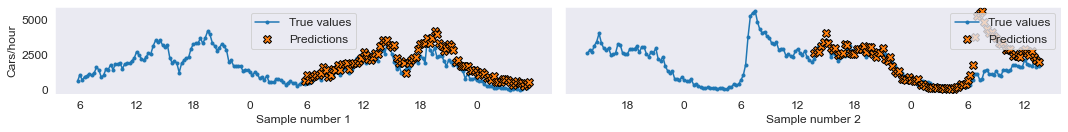

In [9]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/repeat.png")

# 4. Repeat last value regressor

In [10]:
estimator, train_losses, test_losses = timeseries_cv(RepeatLastRegressor(), train_x, train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 1326.28, std: 55.70
Test MAE: 1280.12, std: 152.72


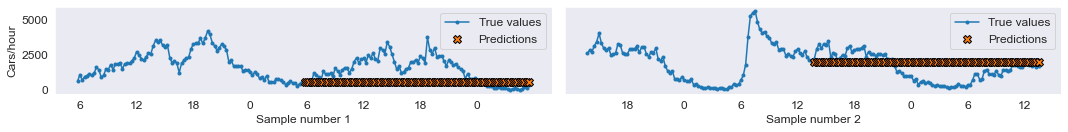

In [11]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/repeat_last.png")

# 5. Mean per hour

In [12]:
estimator, train_losses, test_losses = timeseries_cv(DaytimeRegressor("mean"), train_x[:, :, :, [0, 1]], train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 447.23, std: 20.00
Test MAE: 476.04, std: 57.16


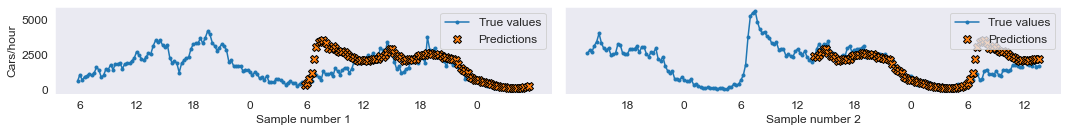

In [13]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean_hour.png")

In [14]:
estimator, train_losses, test_losses = timeseries_cv(DaytimeRegressor("mean", by_working_day=True), train_x[:, :, :, [0, 1, 2]], train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 450.46, std: 31.60
Test MAE: 483.80, std: 60.08


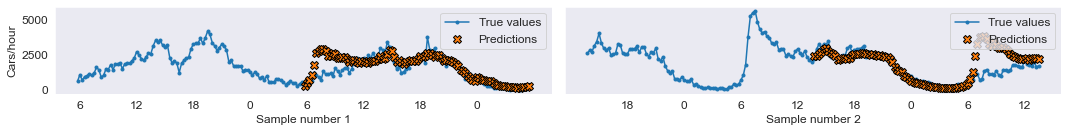

In [15]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/mean_hour_workingday.png")

# 6. Median per hour

In [16]:
estimator, train_losses, test_losses = timeseries_cv(DaytimeRegressor("median"), train_x[:, :, :, [0, 1]], train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 442.34, std: 19.32
Test MAE: 480.61, std: 87.82


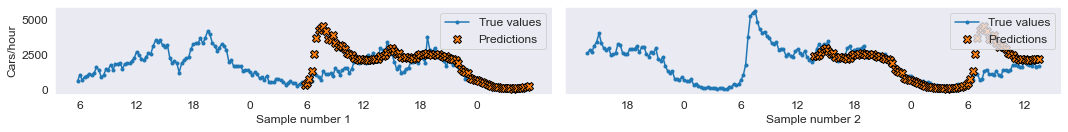

In [17]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median_hour.png")

In [18]:
estimator, train_losses, test_losses = timeseries_cv(DaytimeRegressor("median", by_working_day=True), train_x[:, :, :, [0, 1, 2]], train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 443.20, std: 28.62
Test MAE: 489.38, std: 87.35


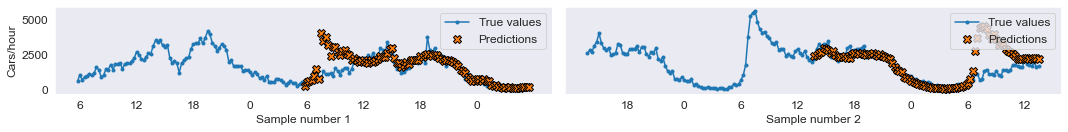

In [19]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/median_hour_workingday.png")

# 7. Drift regressor

In [20]:
estimator, train_losses, test_losses = timeseries_cv(DriftRegressor(), train_x, train_y)
mean_train_loss = np.mean(train_losses)
mean_test_loss = np.mean(test_losses)
print(f"Train MAE: {mean_train_loss:.2f}, std: {np.std(train_losses):.2f}")
print(f"Test MAE: {mean_test_loss:.2f}, std: {np.std(test_losses):.2f}")

Train MAE: 1419.48, std: 65.93
Test MAE: 1361.05, std: 151.21


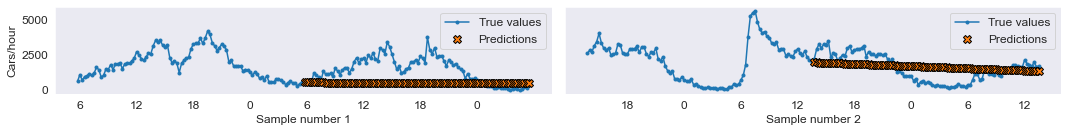

In [21]:
plot_predictions(estimator, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], name_save=baseline_path + "/drift.png")